# Exercise 2

Problem 1 : Data Preparation
Download the dataset from the following Kaggle Competition (login required) – Go to “Data”, and “Download All”.
House Prices Competition : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [46]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

a) Import the “train.csv” data from the downloaded data folder (has four files) in Jupyter Notebook.

In [47]:
House = pd.read_csv('train.csv')
House.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


b) What are the data types (“dtypes”) – int64/float64/object – of the variables (columns) in the dataset?

In [48]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

c) Extract only the variables (columns) of type Integer (int64), and store as a new Pandas DataFrame.

Method 1

In [49]:
House_int64 = House.select_dtypes(include='int64')

House_int64.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtFinSF2     1460 non-null   int64
 9   BsmtUnfSF      1460 non-null   int64
 10  TotalBsmtSF    1460 non-null   int64
 11  1stFlrSF       1460 non-null   int64
 12  2ndFlrSF       1460 non-null   int64
 13  LowQualFinSF   1460 non-null   int64
 14  GrLivArea      1460 non-null   int64
 15  BsmtFullBath   1460 non-null   int64
 16  BsmtHalfBath   1460 non-null   int64
 17  FullBath       1460 non-null   int64
 18  HalfBath       1460 non-null   int64
 19  Bedroo

Method 2

In [50]:
HouseData = pd.DataFrame(House[["Id", "MSSubClass", "LotArea", "MoSold", "YrSold", "SalePrice"]])

HouseData.head()

,Id,MSSubClass,LotArea,MoSold,YrSold,SalePrice
0,1,60,8450,2,2008,208500
1,2,20,9600,5,2007,181500
2,3,60,11250,9,2008,223500
3,4,70,9550,2,2006,140000
4,5,60,14260,12,2008,250000


d) Read “data_description.txt” (from the Kaggle data folder) to identify the actual Numeric variables.
Note : You have to manually read through the text file, and try to judge the actual variable types.

In [51]:
f = open("data_description.txt", "r")
print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

e) Drop non-Numeric variables from the DataFrame to have a clean DataFrame with Numeric variables.

Method 1

In [52]:
HouseNum = House_int64.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold'], axis=1)

In [53]:
HouseNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   BsmtFinSF1     1460 non-null   int64
 3   BsmtFinSF2     1460 non-null   int64
 4   BsmtUnfSF      1460 non-null   int64
 5   TotalBsmtSF    1460 non-null   int64
 6   1stFlrSF       1460 non-null   int64
 7   2ndFlrSF       1460 non-null   int64
 8   LowQualFinSF   1460 non-null   int64
 9   GrLivArea      1460 non-null   int64
 10  BsmtFullBath   1460 non-null   int64
 11  BsmtHalfBath   1460 non-null   int64
 12  FullBath       1460 non-null   int64
 13  HalfBath       1460 non-null   int64
 14  BedroomAbvGr   1460 non-null   int64
 15  KitchenAbvGr   1460 non-null   int64
 16  TotRmsAbvGrd   1460 non-null   int64
 17  Fireplaces     1460 non-null   int64
 18  GarageCars     1460 non-null   int64
 19  Garage

Method 2

In [54]:
HouseData = pd.DataFrame(House[["LotArea", "SalePrice"]])

HouseData.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


Problem 2 : Statistical Summary

a) Find the Summary Statistics (Mean, Median, Quartiles etc) of SalePrice from the Numeric DataFrame.

In [55]:
HouseData["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

b) Visualize the summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

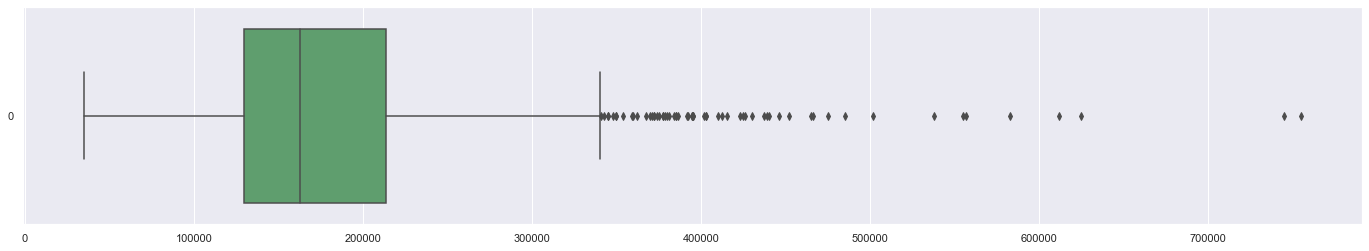

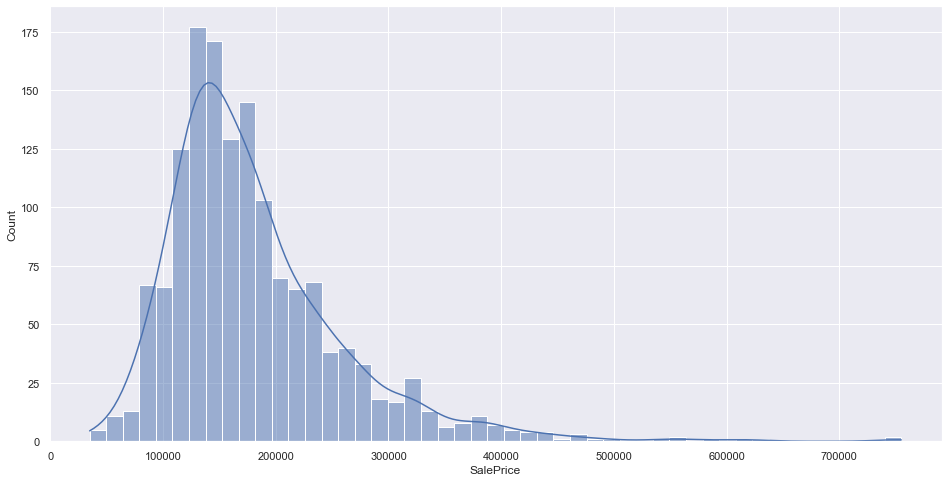

In [64]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = HouseData["SalePrice"], orient = "h", color = "g")

f = plt.figure(figsize=(16, 8))
sb.histplot(data = HouseData["SalePrice"], kde = True)

c) Find the Summary Statistics (Mean, Median, Quartiles etc) of LotArea from the Numeric DataFrame.

In [57]:
HouseData["LotArea"].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

d) Visualize the summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE.

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

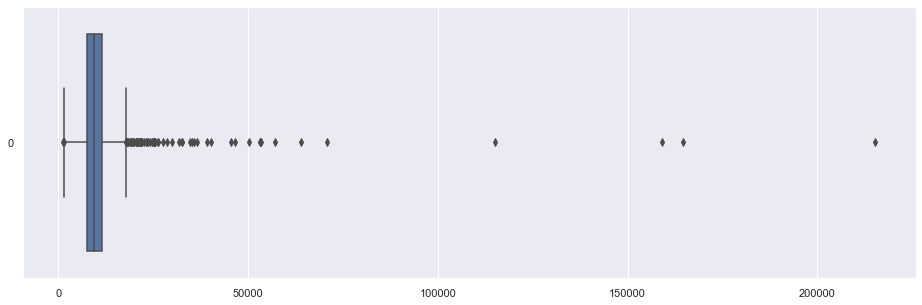

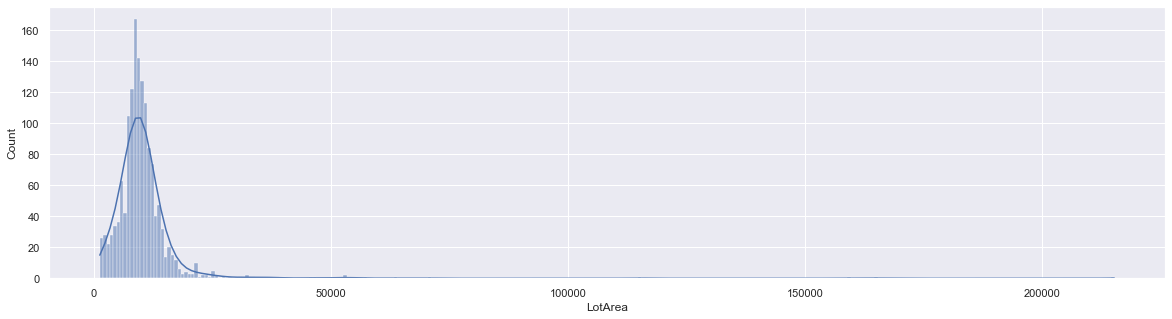

In [58]:
f = plt.figure(figsize=(16, 5))
sb.boxplot(data = HouseData["LotArea"], orient = "h")

f = plt.figure(figsize=(20, 5))
sb.histplot(data = HouseData["LotArea"], kde = True)

e) Plot SalePrice (y-axis) vs LotArea (x-axis) using jointplot, and check the Correlation between the two.

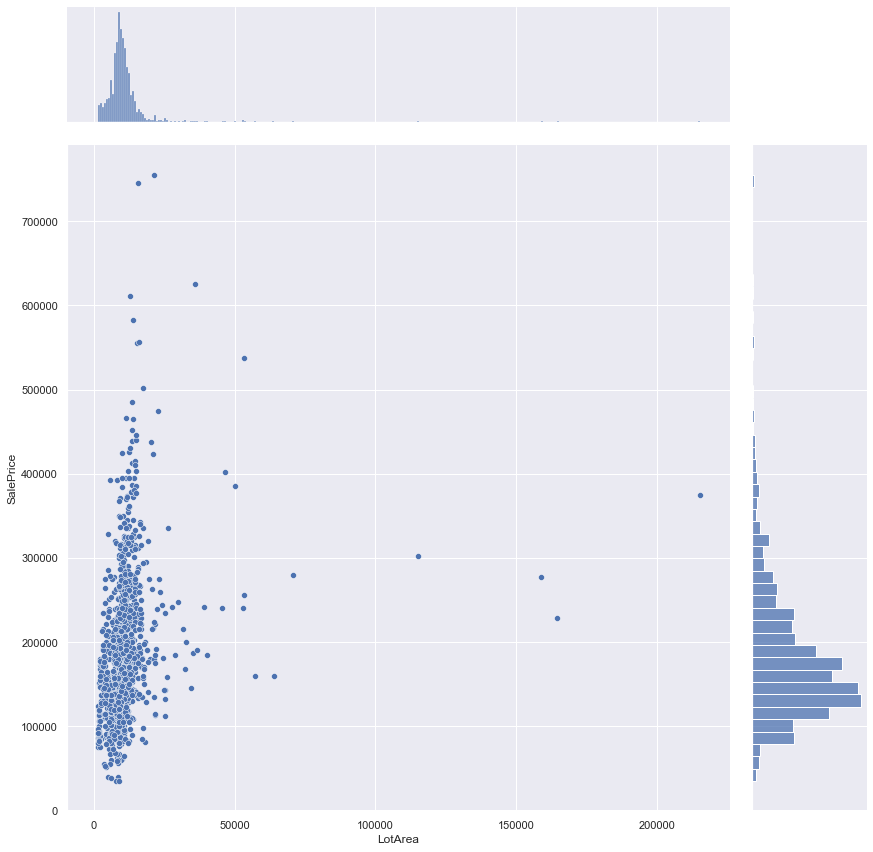

In [59]:
sb.jointplot(data = HouseData, x = "LotArea", y = "SalePrice", height = 12)

In [60]:
HouseData.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


<AxesSubplot:>

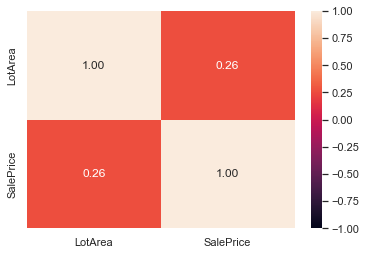

In [61]:
sb.heatmap(HouseData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")